In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.integrate import simpson


In [74]:
def sell_call(x, call_price, strike_price):
    """
    Calculate the profit/loss for selling a call option.

    Parameters:
    - x: array-like, stock prices at expiration.
    - call_price: float, premium received for selling the call.
    - strike_price: float, strike price of the call option.

    Returns:
    - array-like, profit/loss values.
    """
    return np.minimum(0, strike_price - x) + call_price

Break-even Point: 4.2219
Break-even Probability (%): 67.3099
Max Profit Point: 4.2000
Max Profit: 0.0219
Max Profit Probability (%): 66.3074
Expected Profit: -0.1741
Expected Profit Rate (%): -4.1671


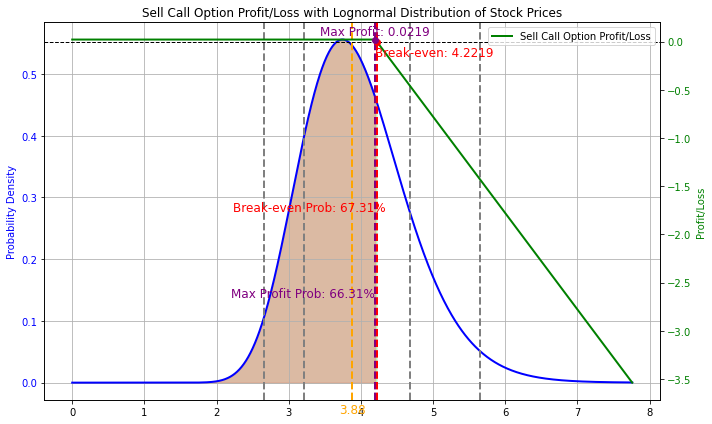

In [77]:
def plot_sell_call_profit_loss(stock_price, call_price, strike_price, sigma):
    """
    Plot the profit/loss and lognormal distribution for selling a call option.
    
    Parameters:
    - stock_price: float, current stock price.
    - call_price: float, premium received for selling the call.
    - strike_price: float, strike price of the call option.
    - sigma: float, volatility (standard deviation) of the stock.

    Returns:
    - dict with key financial metrics.
    """
    # Parameters
    mu = np.log(stock_price)  # Mean of the log of the stock price (lognormal)

    # Generate a range of possible stock prices at expiration
    x_range = np.linspace(0, stock_price * 2, 1000)
    
    # Calculate the lognormal distribution curve for the stock prices
    pdf = lognorm.pdf(x_range, sigma, scale=np.exp(mu))  # Lognormal distribution   

    # Calculate the profit/loss for selling the call option
    profits = sell_call(x_range, call_price, strike_price)
    
    # Break-even point
    break_even_x = strike_price + call_price  # Break-even is strike price + call price
    break_even_probability = lognorm.cdf(break_even_x, sigma, scale=np.exp(mu))
    
    # Max Profit point
    max_profit_x = strike_price
    max_profit = call_price
    max_profit_probability = lognorm.cdf(max_profit_x, sigma, scale=np.exp(mu))
    
    # Calculate the expected profit using numerical integration
    expected_profit = simpson(profits * pdf, x_range)
    cost = strike_price - call_price  # Assuming 100% deposit
    expected_profit_rate = expected_profit / cost
    
    # Prepare the data to return
    data = {
        'Break-even Point': break_even_x,
        'Break-even Probability (%)': break_even_probability * 100,
        'Max Profit Point': max_profit_x,
        'Max Profit': max_profit,
        'Max Profit Probability (%)': max_profit_probability * 100,
        'Expected Profit': expected_profit,
        'Expected Profit Rate (%)': expected_profit_rate * 100,
    }
    
    # Print the results
    for key, value in data.items():
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")
    
    # Plot the profit/loss curve
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Lognormal Distribution Curve on the primary y-axis
    ax1.plot(x_range, pdf, color='blue', label='Lognormal Distribution of Stock Prices', linewidth=2)
    ax1.set_ylabel("Probability Density", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Profit/Loss Curve on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(x_range, profits, color='green', label='Sell Call Option Profit/Loss', linewidth=2)
    ax2.axhline(0, color='black', linestyle='--', linewidth=1)
    ax2.set_ylabel("Profit/Loss", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Break-even Point Marking
    ax2.axvline(break_even_x, color='red', linestyle='--', linewidth=2)
    ax2.scatter(break_even_x, 0, color='red', zorder=5)
    ax2.text(break_even_x + 0.8, -0.15, f"Break-even: {break_even_x:.4f}", fontsize=12, color='red', ha='center')
    ax1.text(break_even_x - 2, max(pdf) * 0.5, 
             f"Break-even Prob: {break_even_probability*100:.2f}%", fontsize=12, color='red')
    ax1.fill_between(x_range, 0, pdf, where=(x_range <= break_even_x), 
                     color='lightgreen', alpha=0.5)

    # Max Profit Point Marking
    ax2.axvline(max_profit_x, color='purple', linestyle='--', linewidth=2)
    ax2.scatter(max_profit_x, max_profit, color='purple', zorder=5)
    ax2.text(max_profit_x, max_profit + 0.05, f"Max Profit: {max_profit:.4f}", fontsize=12, color='purple', ha='center')
    ax1.text(max_profit_x - 2, max(pdf) * 0.25, 
             f"Max Profit Prob: {max_profit_probability*100:.2f}%", fontsize=12, color='purple')
    ax1.fill_between(x_range, 0, pdf, where=(x_range <= max_profit_x), 
                     color='lightcoral', alpha=0.5)

    # Vertical Lines at +/- 1 Sigma and +/- 2 Sigma
    for i in [-2, -1, 1, 2]:
        sigma_line = stock_price * np.exp(i * sigma)
        ax1.axvline(sigma_line, color='grey', linestyle='--', linewidth=2)

    # Current Stock Price Plotting
    ax1.axvline(stock_price, color='orange', linestyle='--', linewidth=2)
    ax1.text(stock_price, -0.05, f"{stock_price:.2f}", fontsize=12, color='orange', ha='center')

    # Title and grid
    ax1.set_title("Sell Call Option Profit/Loss with Lognormal Distribution of Stock Prices")
    ax1.grid(True)

    # Add the single legend for the lognormal distribution curve
    ax2.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

    
    return data

# Example Usage:
stock_price = 3.880 # Current stock price
call_price = 0.0219     # Call premium received
strike_price = 4.2 # Strike price of the call option
sigma = 0.1883        # Volatility of the stock

# Call the function
results = plot_sell_call_profit_loss(stock_price, call_price, strike_price, sigma)
